<a href="https://colab.research.google.com/github/Annieqyc/STATS201-Qinyi-Chen/blob/main/STATS_201_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Libraries using the code provided in the research
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline

import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
!pip install optuna
import optuna
import xgboost as xgb
from xgboost import XGBClassifier
!pip install catboost
import catboost
from catboost import CatBoostClassifier
import lightgbm as lgbm
from lightgbm import LGBMClassifier
optuna.logging.set_verbosity(optuna.logging.WARNING)
from lightgbm import *
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.4 MB/s eta 0:00:00


In [36]:
# Additional imports for Standard Scaler, Random Forest, and SVM
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Read Dataset
train = pd.read_csv('merged_data.csv', error_bad_lines=False)
display (train)

Skipping line 14075: expected 9 fields, saw 10
Skipping line 42215: expected 9 fields, saw 12

Skipping line 126370: expected 9 fields, saw 11

Skipping line 168410: expected 9 fields, saw 14

Skipping line 210373: expected 9 fields, saw 14



,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15.0,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15.0,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15.0,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15.0,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15.0,2020-07-08 14:03:00.124999936,2.0
...,...,...,...,...,...,...,...,...,...
238586,13.0,-25.0,58.0,0.553802,65.37,32.09,15.0,2020-07-21 16:35:46.312499968,2.0
238587,11.0,-22.0,56.0,0.553802,65.37,32.09,15.0,2020-07-21 16:35:46.343749888,2.0
238588,11.0,-20.0,55.0,0.553802,65.37,32.09,15.0,2020-07-21 16:35:46.375000064,2.0
238589,21.0,-19.0,65.0,0.553802,65.37,32.09,15.0,2020-07-21 16:35:46.406249984,2.0


train


X           0
Y           0
Z           0
EDA         0
HR          3
TEMP        5
id          5
datetime    6
label       6
dtype: int64

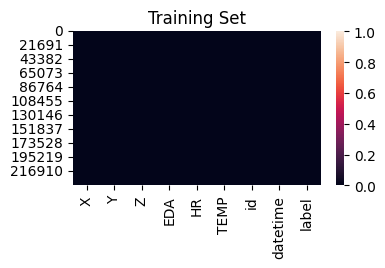

In [38]:
# Delete missing values
print('train')
display(train.isnull().sum())

plt.figure(figsize = (4, 2))
plt.title("Training Set")
sns.heatmap(train.isnull())
plt.show()

In [41]:
print('train')
display(train.info())

train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238591 entries, 0 to 238590
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   X         238591 non-null  float64
 1   Y         238591 non-null  float64
 2   Z         238591 non-null  object 
 3   EDA       238591 non-null  object 
 4   HR        238588 non-null  float64
 5   TEMP      238586 non-null  float64
 6   id        238586 non-null  float64
 7   datetime  238585 non-null  object 
 8   label     238585 non-null  float64
dtypes: float64(6), object(3)
memory usage: 16.4+ MB


None

# 新段落

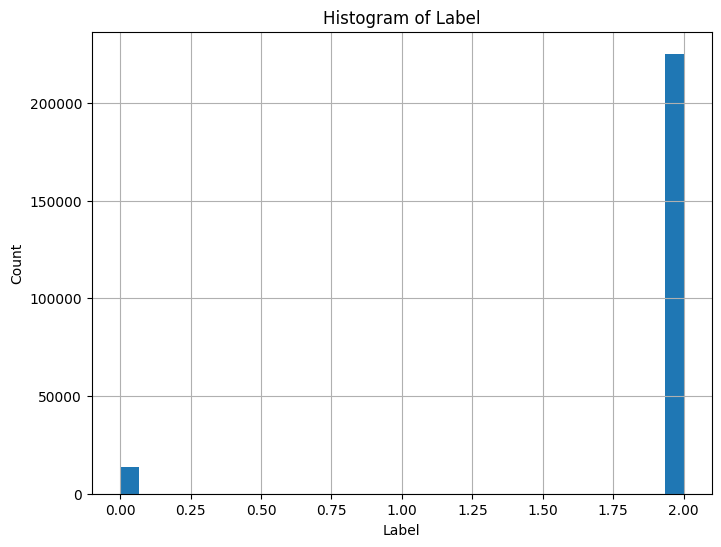

In [42]:
# Check the distribution of stress levels in this dataframe
# Displaying the histogram for the 'label' column
plt.figure(figsize=(8, 6))
train['label'].hist(bins=30)
plt.title('Histogram of Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [43]:
#Delete unneeded columns
train= train.drop(columns=['id'],axis=1)
train

,X,Y,Z,EDA,HR,TEMP,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,2020-07-08 14:03:00.124999936,2.0
...,...,...,...,...,...,...,...,...
238586,13.0,-25.0,58.0,0.553802,65.37,32.09,2020-07-21 16:35:46.312499968,2.0
238587,11.0,-22.0,56.0,0.553802,65.37,32.09,2020-07-21 16:35:46.343749888,2.0
238588,11.0,-20.0,55.0,0.553802,65.37,32.09,2020-07-21 16:35:46.375000064,2.0
238589,21.0,-19.0,65.0,0.553802,65.37,32.09,2020-07-21 16:35:46.406249984,2.0


In [24]:
# Convert the object columns by LabelEncoder()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['datetime'] = le.fit_transform(train['datetime'])
display(train)

,X,Y,Z,EDA,HR,TEMP,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,59520,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,59521,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,59522,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,59523,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,59524,2.0
...,...,...,...,...,...,...,...,...
238586,13.0,-25.0,58.0,0.553802,65.37,32.09,126281,2.0
238587,11.0,-22.0,56.0,0.553802,65.37,32.09,126282,2.0
238588,11.0,-20.0,55.0,0.553802,65.37,32.09,126283,2.0
238589,21.0,-19.0,65.0,0.553802,65.37,32.09,126284,2.0


from matplotlib import pyplot as plt
train['X'].plot(kind='hist', bins=20, title='X')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train['HR'].plot(kind='hist', bins=20, title='HR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train['TEMP'].plot(kind='hist', bins=20, title='TEMP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train.plot(kind='scatter', x='X', y='Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train.plot(kind='scatter', x='Y', y='HR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train.plot(kind='scatter', x='HR', y='TEMP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train.plot(kind='scatter', x='TEMP', y='datetime', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['X']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('X')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['Y']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('Y')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['HR']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('HR')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['TEMP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('TEMP')

from matplotlib import pyplot as plt
train['X'].plot(kind='line', figsize=(8, 4), title='X')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
train['Y'].plot(kind='line', figsize=(8, 4), title='Y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
train['HR'].plot(kind='line', figsize=(8, 4), title='HR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
train['TEMP'].plot(kind='line', figsize=(8, 4), title='TEMP')
plt.gca().spines[['top', 'right']].set_visible(False)

In [57]:
def convert_to_float(value):
    try:
        # Split the string by colon and convert to float
        numbers = [float(num) for num in str(value).split(':')]
        # Return the average or you can choose another method (e.g., min, max)
        return sum(numbers) / len(numbers)
    except ValueError:
        # In case of any error, return NaN or some default value
        return float('nan')

# Apply the function to the 'Z' column
train['Z'] = train['Z'].apply(convert_to_float)

# After cleaning, try calculating skewness and kurtosis again
print("Z")
print("Skewness: %f" % train['Z'].skew())
print("Kurtosis: %f" % train['Z'].kurt())


# Apply the function to the 'EDA' column
train['EDA'] = train['EDA'].apply(convert_to_float)

# After cleaning, try calculating skewness and kurtosis again
print("EDA")
print("Skewness: %f" % train['EDA'].skew())
print("Kurtosis: %f" % train['EDA'].kurt())

Z
Skewness: 1.507975
Kurtosis: 199.750736
EDA
Skewness: 1.170193
Kurtosis: 1.119648
0   2020-07-08 03:00:00
1   2020-07-08 03:00:01
2   2020-07-08 03:00:03
3   2020-07-08 03:00:05
4   2020-07-08 03:00:07
Name: datetime, dtype: datetime64[ns]


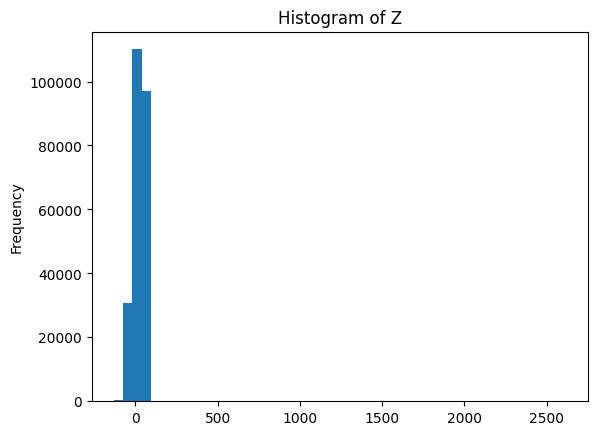

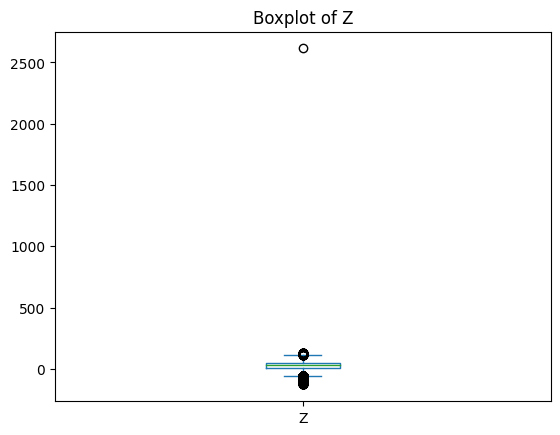

In [49]:
import matplotlib.pyplot as plt

train['Z'].plot(kind='hist', bins=50)
plt.title('Histogram of Z')
plt.show()

train['Z'].plot(kind='box')
plt.title('Boxplot of Z')
plt.show()



In [60]:
print("X")
print("Skewness: %f" % train['X'].skew())
print("Kurtosis: %f" % train['X'].kurt())
print("Y")
print("Skewness: %f" % train['Y'].skew())
print("Kurtosis: %f" % train['Y'].kurt())
print("Z")
print("Skewness: %f" % train['Z'].skew())
print("Kurtosis: %f" % train['Z'].kurt())
print("EDA")
print("Skewness: %f" % train['EDA'].skew())
print("Kurtosis: %f" % train['EDA'].kurt())
print("HR")
print("Skewness: %f" % train['HR'].skew())
print("Kurtosis: %f" % train['HR'].kurt())
print("TEMP")
print("Skewness: %f" % train['TEMP'].skew())
print("Kurtosis: %f" % train['TEMP'].kurt())

X
Skewness: 0.850006
Kurtosis: 0.846029
Y
Skewness: -0.314127
Kurtosis: 0.386831
Z
Skewness: 1.507975
Kurtosis: 199.750736
EDA
Skewness: 1.170193
Kurtosis: 1.119648
HR
Skewness: 0.748359
Kurtosis: 1.316763
TEMP
Skewness: 0.178701
Kurtosis: -0.892743


In [61]:
print("EDA Original value")
print("Skewness: %f" % train['EDA'].skew())
print("Kurtosis: %f" % train['EDA'].kurt())

print("EDA Adjusted value")
train['EDA'] = train['EDA']**(1/3)
print('skewness:%f'%stats.skew(train['EDA'], bias = False))
print('kurtosis:%f'%stats.kurtosis(train['EDA'], bias = False, fisher=True))


EDA Original value
Skewness: 1.170193
Kurtosis: 1.119648
EDA Adjusted value
skewness:-0.323939
kurtosis:0.207442


In [83]:
# Preprocess: Normalization using Standard Scaler Normalization
from sklearn.preprocessing import StandardScaler

X= train.drop(columns=['label','datetime'],axis=1)
y= train['label']

X_train=X
y_train=y

StandardScaler = StandardScaler()
X_train = StandardScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
# Remove rows with NaN values
X_train_dropped = X_train.dropna()
X_train

,0,1,2,3,4,5
0,0.908832,-2.293430,-0.538753,1.117119,1.159077,-1.785638
1,0.638681,-2.562537,-0.798913,1.117119,1.159077,-1.785638
2,0.214159,-2.865282,-1.189155,1.117119,1.159077,-1.785638
3,-0.403329,-2.427984,-1.937117,1.117119,1.159077,-1.785638
4,-1.175188,-2.158877,-2.424919,1.117119,1.159077,-1.785638
...,...,...,...,...,...,...
238580,1.873657,-1.149726,1.249853,-1.421176,-1.817097,-0.840337
238581,1.912250,-1.082449,1.184813,-1.421176,-1.817097,-0.840337
238582,1.835064,-0.981534,1.119773,-1.421176,-1.817097,-0.840337
238583,1.835064,-0.914258,1.087253,-1.421176,-1.817097,-0.840337


In [85]:
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train,test_size=0.2,random_state=2019)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_eval.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_eval.shape)

Shape of X_train:  (152694, 6)
Shape of X_eval:  (38174, 6)
Shape of y_train:  (152694,)
Shape of y_eval (38174,)


[LightGBM] [Info] Number of positive: 225145, number of negative: 13440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 238585, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.943668 -> initscore=2.818509
[LightGBM] [Info] Start training from score 2.818509
LGBMClassifi: 
 [167 248 227 627 782 949]


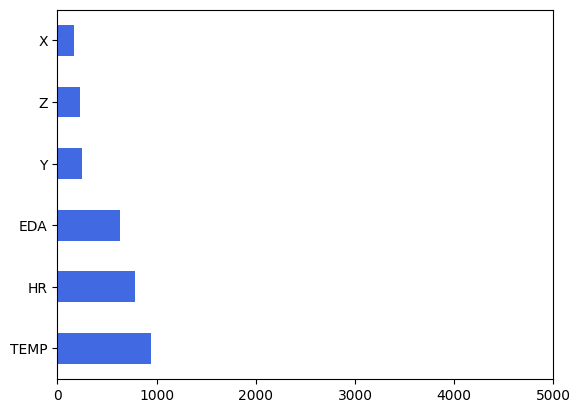

In [78]:
#Feature Selection Using LGBMClassifier
train = train.dropna(subset=['label'])
X_data_feature= train.drop(columns=['label','datetime'],axis=1)
y_data_feature= train['label']

# Remove rows with NaN values
X_data_feature = X_data_feature.dropna()
y_data_feature = y_data_feature.reindex(X_data_feature.index)

from sklearn.impute import SimpleImputer

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Apply the imputer
X_data_feature = pd.DataFrame(imputer.fit_transform(X_data_feature), columns=X_data_feature.columns)


import matplotlib.pyplot as plt

model = [LGBMClassifier()]

model = [model[i].fit(X_data_feature, y_data_feature) for i in range(len(model))]

num_chr = [12, 12, 10]

for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \n',
          model[i].feature_importances_)
    feat_importances = pd.Series(model[i].feature_importances_,
                                 index=X_data_feature.columns)
    feat_importances.nlargest(7).plot(kind='barh', color='royalblue')
    plt.xlim(0, 5000)
    plt.show()

Analyzed feature importance

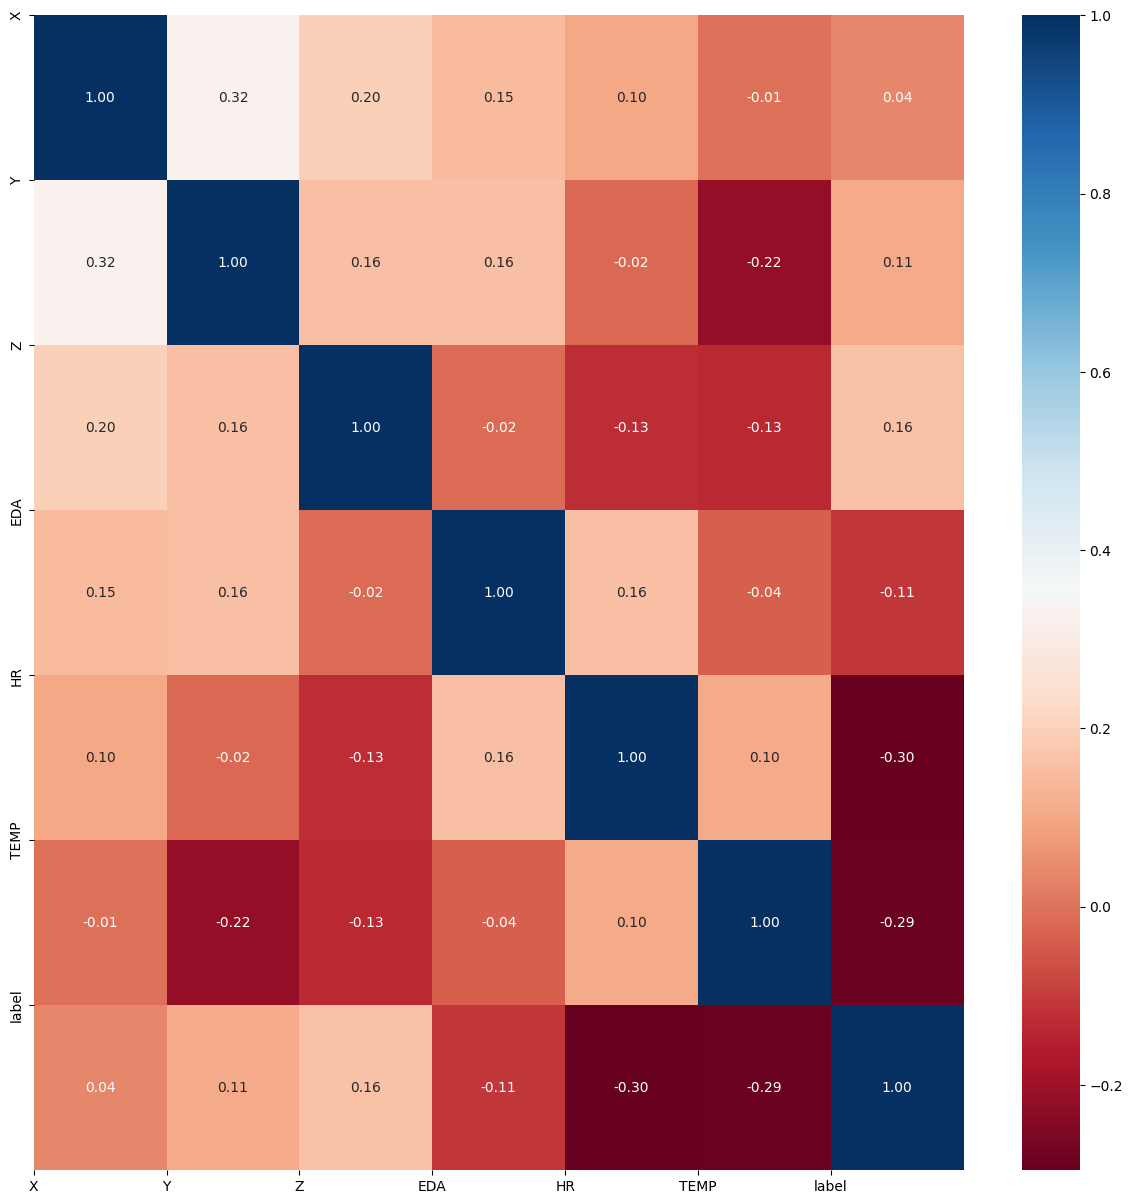

In [81]:
#Find relations between features
corr = train.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [86]:
#PCA
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA(n_components=6).fit(X_train)
exp = pca.explained_variance_ratio_
print(exp)

[0.26695605 0.21280644 0.16072926 0.13141827 0.12949552 0.09859445]


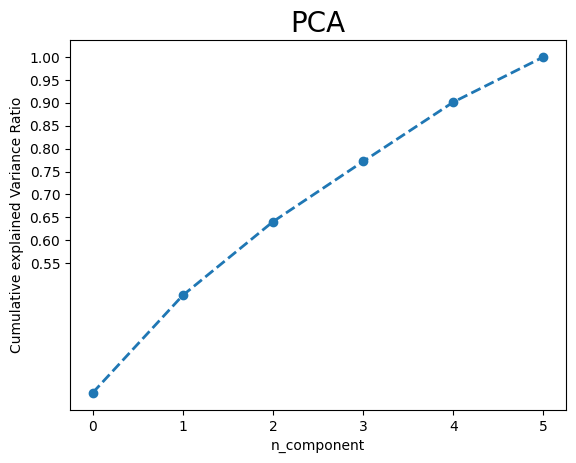

In [87]:
plt.plot(np.cumsum(exp), linewidth=2, marker = 'o', linestyle = '--')
plt.title("PCA", fontsize=20)
plt.xlabel('n_component')
plt.ylabel('Cumulative explained Variance Ratio')
plt.yticks(np.arange(0.55, 1.05, 0.05))
plt.show()

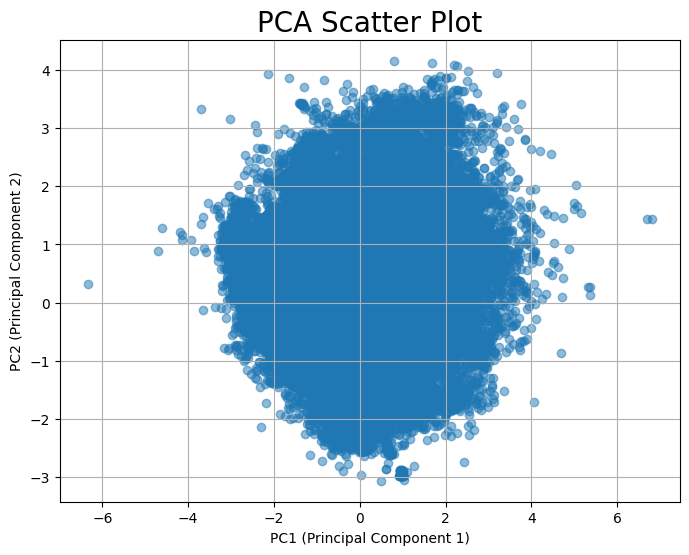

In [88]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA
pca = PCA(n_components=6)
pca_result = pca.fit_transform(X_train)

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)  # PC1 is at index 0, PC2 is at index 1
plt.title("PCA Scatter Plot", fontsize=20)
plt.xlabel('PC1 (Principal Component 1)')
plt.ylabel('PC2 (Principal Component 2)')
plt.grid(True)
plt.show()


In [89]:
X_train_pca = IncrementalPCA(n_components=5).fit_transform(X_train)
X_eval_pca = IncrementalPCA(n_components=5).fit_transform(X_eval)

X_train=X_train_pca
X_eval=X_eval_pca

display(X_train)
display(X_eval)

array([[-0.12025842,  1.35660454,  1.5700593 ,  0.07342896,  1.91481659],
       [-0.54164214, -0.84287599,  1.71940158,  2.16937952, -0.1626998 ],
       [-0.22489853, -1.10264955,  0.48075794, -1.21534953,  0.67272396],
       ...,
       [-0.07176546, -0.80758063,  0.91261812,  0.90658375,  0.5733209 ],
       [ 0.67729095, -1.0924888 ,  0.66408955, -0.27719027,  0.44213379],
       [-0.63451167, -0.0818939 ,  1.56796067,  1.45371984,  0.38067014]])

array([[-1.84568662e+00, -8.64473235e-01,  1.38101101e-01,
        -7.19975059e-01, -7.63749741e-02],
       [-1.03774075e+00, -1.25699647e-01, -9.27875453e-01,
        -2.09412820e+00,  4.13889856e-05],
       [ 3.15473529e-01, -2.41575559e+00, -2.12711487e-01,
         6.91709081e-01, -9.73406910e-01],
       ...,
       [ 1.48419332e+00,  4.51002250e-01,  2.14362012e+00,
         4.67361068e-01, -2.66338502e-01],
       [ 4.97343593e-01, -8.83593774e-01,  1.17131843e-01,
         6.75141172e-01,  6.03468661e-01],
       [ 1.15407769e+00,  1.54318642e+00, -5.87299203e-01,
         3.76239975e-01,  2.03756595e+00]])

In [90]:
print(X_train.shape)
print(X_eval.shape)

(152694, 5)
(38174, 5)


In [99]:
#Training Models
#SVC
svm_model = SVC(decision_function_shape='ovo')
svm_model.fit(X_train, y_train)



SVC(decision_function_shape='ovo')

In [94]:
#Random Forest
rf_model = RandomForestClassifier(random_state=42)  # Always good to set a random_state for reproducibility
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

SVC accuracy is: 97.632%


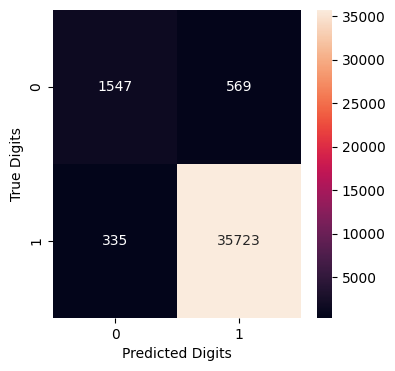

In [101]:
# Predict on the evaluation set
y_pred_SVC = svm_model.predict(X_eval)

# Calculate accuracy
SVC_acc = accuracy_score(y_eval, y_pred_SVC)
print("SVC accuracy is: {0:.3f}%".format(SVC_acc * 100))

# Generate the confusion matrix
cm = confusion_matrix(y_eval, y_pred_SVC)

# Plot the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()


Random Forest accuracy is: 97.543%


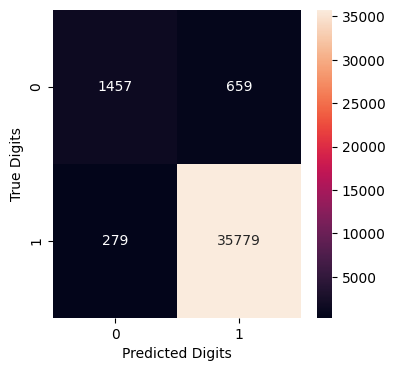

In [102]:
# Predict on the evaluation set
y_pred_RF = rf_model.predict(X_eval)

# Calculate accuracy
RF_acc = accuracy_score(y_eval, y_pred_RF)
print("Random Forest accuracy is: {0:.3f}%".format(RF_acc * 100))

# Generate the confusion matrix
cm = confusion_matrix(y_eval, y_pred_RF)

# Plot the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show


In [103]:
models = [('SVC', SVC_acc),
          ('Random Forest', RF_acc)
         ]

predict = pd.DataFrame(data = models, columns=['Model', 'Accuracy'])
predict

,Model,Accuracy
0,SVC,0.976319
1,Random Forest,0.975428


from matplotlib import pyplot as plt
predict['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
predict.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predict['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(predict['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(predict, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

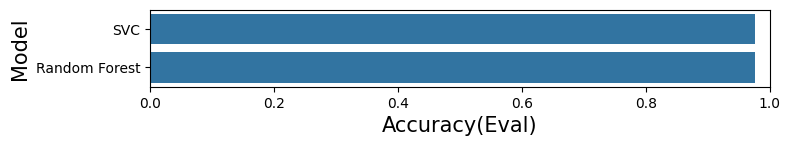

In [104]:
#Calculate the accuracy in predicting 0 and 1 separately.